## ANALISIS SENTIMEN DENGAN KOMPARASI RANDOM FOREST, SVM DAN NAIVE BAYES
# MENGGUNAKAN DATASET 20 APLIKASI EDUKASI ANAK
by Fadhil Albar

# MOUNTING CSV VIA GOOGLE DRIVE

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# INSTALL LIBRARIES

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

# PEMBUATAN DATAFRAME DARI CSV

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv/combined_csv.csv')

In [ ]:
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True)
sorteddata.head()

,content,score,at
8499,keren top,5,2012-11-15 15:41:32
8498,"Bagus,simple, mudah dipahami",5,2013-05-09 23:11:45
8497,Bagus,5,2013-05-10 06:55:39
8496,Oce,5,2013-05-12 01:49:29
8495,sangat mendidik,5,2013-05-13 09:27:08


In [ ]:
sorteddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8499 to 500
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9990 non-null   object
 1   score    10000 non-null  int64 
 2   at       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [ ]:
df = sorteddata

In [ ]:
df['score'].value_counts()

5    7203
4    1179
1     674
3     662
2     282
Name: score, dtype: int64

<Axes: xlabel='score'>

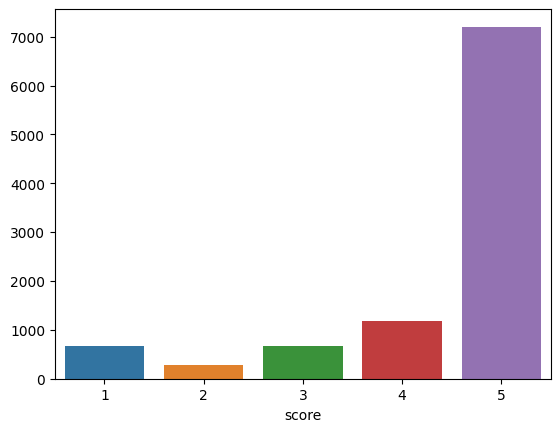

In [ ]:
import seaborn as sns
result = df.groupby(['score']).size()

# plot the result
sns.barplot(x = result.index, y = result.values)

# LABELING SENTIMEN

In [ ]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append(1)
    elif row['score'] == 3:
        sentimen.append(0)
    else:
        sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,content,score,at,sentiment
8499,keren top,5,2012-11-15 15:41:32,1
8498,"Bagus,simple, mudah dipahami",5,2013-05-09 23:11:45,1
8497,Bagus,5,2013-05-10 06:55:39,1
8496,Oce,5,2013-05-12 01:49:29,1
8495,sangat mendidik,5,2013-05-13 09:27:08,1


In [ ]:
df['sentiment'].value_counts()

 1    8382
-1     956
 0     662
Name: sentiment, dtype: int64

# PREPROCESSING DATA

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**NORMALISASI** **TEKS**

1. merubah teks menjadi lower case

In [ ]:
df['content'] = df['content'].str.lower()

2. menghapus mention

In [ ]:
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)

3. menghapus hashtag

In [ ]:
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)

4. menghapus next character

In [ ]:
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)

5. menghapus tanda baca

In [ ]:
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)

6. menghapus whitespace

In [ ]:
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)

7. menghapus URL

In [ ]:
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)

**TOKENIZING**

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df['content'].dropna(inplace=True)
df['content'] = df['content'].astype(str)
df.head()

,content,score,at,sentiment
8499,keren top,5,2012-11-15 15:41:32,1
8498,bagus simple mudah dipahami,5,2013-05-09 23:11:45,1
8497,bagus,5,2013-05-10 06:55:39,1
8496,oce,5,2013-05-12 01:49:29,1
8495,sangat mendidik,5,2013-05-13 09:27:08,1


In [ ]:
#df['content']=df.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(3)

,content,score,at,sentiment,content_token
8499,keren top,5,2012-11-15 15:41:32,1,"[keren, top]"
8498,bagus simple mudah dipahami,5,2013-05-09 23:11:45,1,"[bagus, simple, mudah, dipahami]"
8497,bagus,5,2013-05-10 06:55:39,1,[bagus]


**MENGHAPUS STOPWORDS**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
# Extend the list with your own custom stopwords
# my_stopwords = ['']
stopwords.extend(my_stopwords)

In [ ]:
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,content,score,at,sentiment,content_token
8499,keren top,5,2012-11-15 15:41:32,1,"[keren, top]"
8498,bagus simple mudah dipahami,5,2013-05-09 23:11:45,1,"[bagus, simple, mudah, dipahami]"
8497,bagus,5,2013-05-10 06:55:39,1,[bagus]


**STEMMING MENGGUNAKAN SASTRAWI**

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [ ]:
df.head(5)

,content,score,at,sentiment,content_token,stemmed
8499,keren top,5,2012-11-15 15:41:32,1,"[keren, top]","[keren, top]"
8498,bagus simple mudah dipahami,5,2013-05-09 23:11:45,1,"[bagus, simple, mudah, dipahami]","[bagus, simple, mudah, paham]"
8497,bagus,5,2013-05-10 06:55:39,1,[bagus],[bagus]
8496,oce,5,2013-05-12 01:49:29,1,[oce],[oce]
8495,sangat mendidik,5,2013-05-13 09:27:08,1,[mendidik],[didik]


In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))

In [ ]:
df.head(5)

,content,score,at,sentiment,content_token,stemmed,text_string
8499,keren top,5,2012-11-15 15:41:32,1,"[keren, top]","[keren, top]",keren
8498,bagus simple mudah dipahami,5,2013-05-09 23:11:45,1,"[bagus, simple, mudah, dipahami]","[bagus, simple, mudah, paham]",bagus simple mudah paham
8497,bagus,5,2013-05-10 06:55:39,1,[bagus],[bagus],bagus
8496,oce,5,2013-05-12 01:49:29,1,[oce],[oce],
8495,sangat mendidik,5,2013-05-13 09:27:08,1,[mendidik],[didik],didik


# PENYAJIAN WORDCLOUD

In [ ]:
!pip install wordcloud

**WORDCLOUD SENTIMEN POSITIF**

In [ ]:
df_p=df[df['sentiment']==1]

In [ ]:
all_words_lem = ' '.join([word for word in df_p['text_string']])

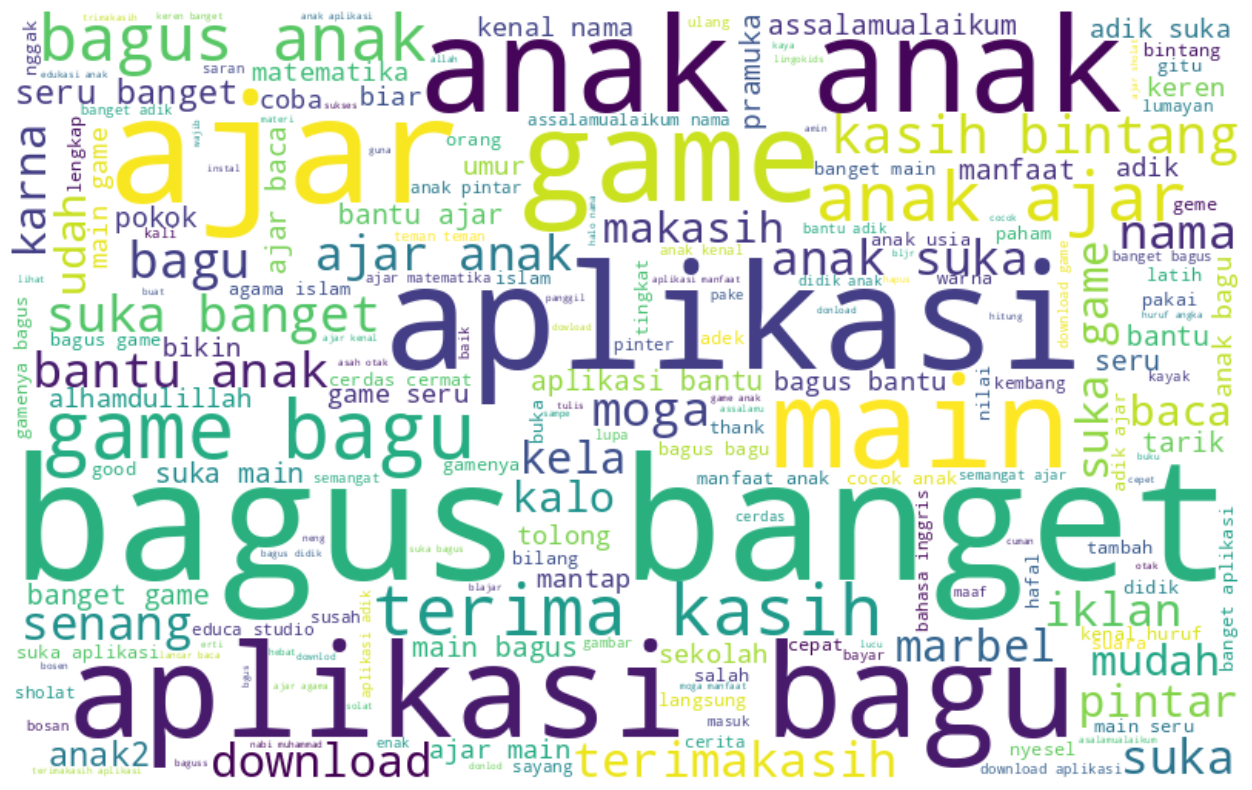

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**WORDCLOUD SENTIMEN NEGATIF**

In [ ]:
df_neg=df[df['sentiment']==-1]

In [ ]:
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])

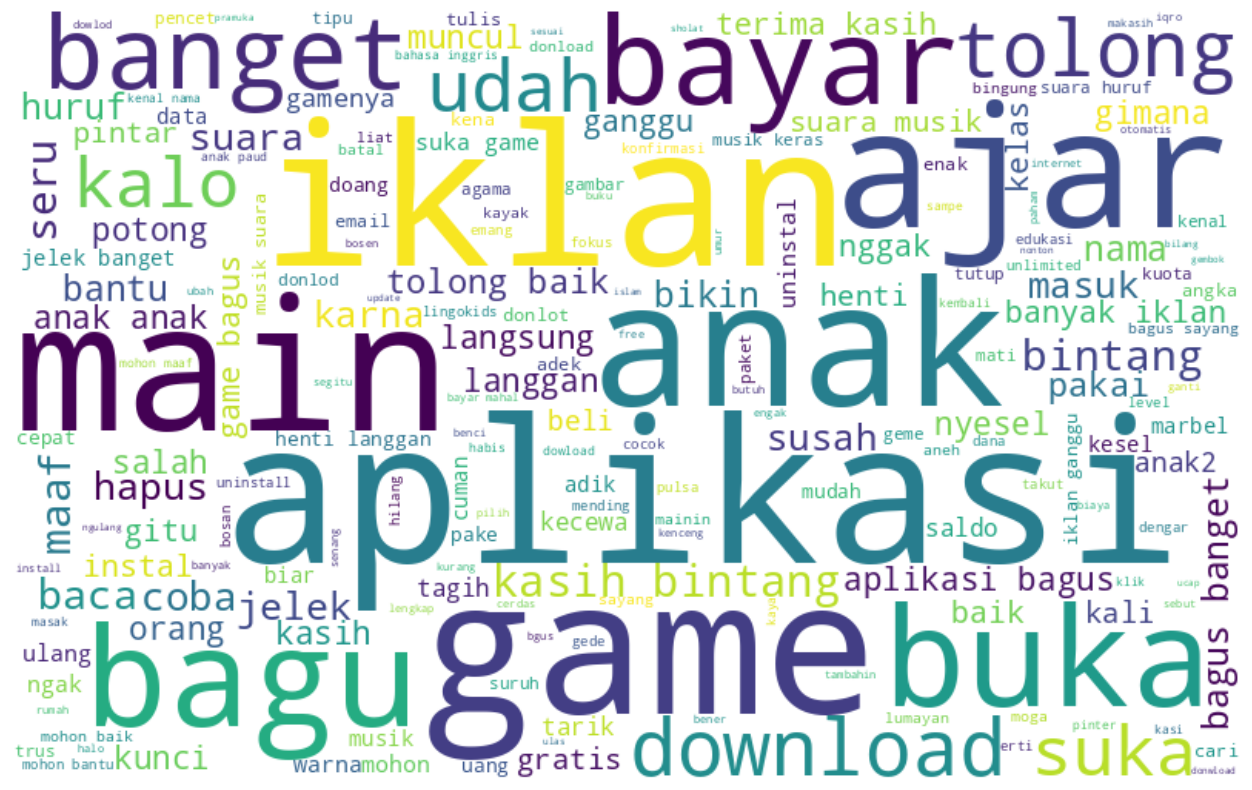

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**WORDCLOUD SENTIMEN NETRAL**

In [ ]:
df_net=df[df['sentiment']==0]

In [ ]:
all_words_lemnet = ' '.join([word for word in df_net['text_string']])

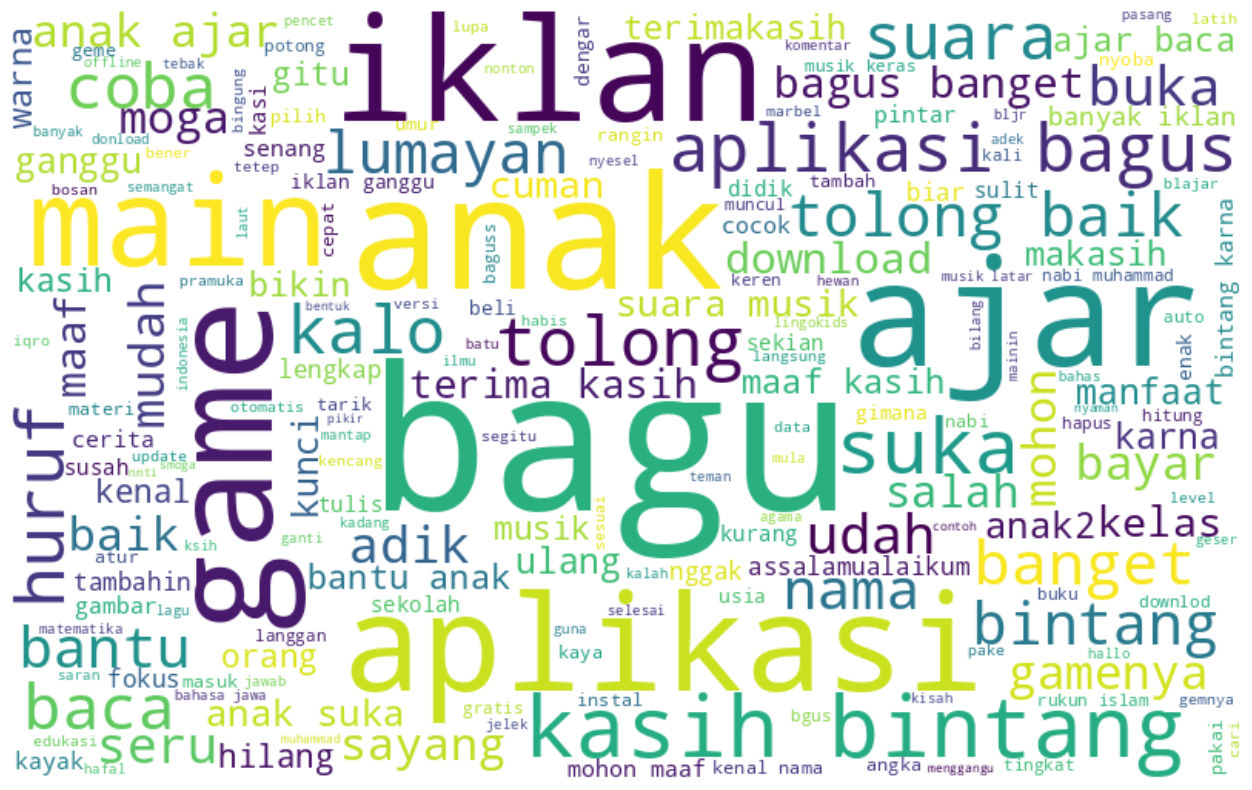

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# PENERAPAN TF-IDF

In [ ]:
df['text_string']

8499                                                keren
8498                             bagus simple mudah paham
8497                                                bagus
8496                                                     
8495                                                didik
                              ...                        
503                                       bantu inspirasi
502                 aplikasi bagus ajar kelas lupa donlot
501                                enak adik hitung mudah
7500    anak umur huruf game bantu ajar kadang aplikas...
500     game bagus ajar matematika seko bagi karna gam...
Name: text_string, Length: 10000, dtype: object

In [ ]:
X = df['text_string']
y = df['sentiment']

In [ ]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

# HANDLING DATA IMBALANCE

In [ ]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# TESTING AKURASI MENGGUNAKAN SKEMA 90% DATA TRAINING 10% DATA TESTING

**Split Data menjadi 90 : 10**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

**Random Forest 90 : 10**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.9069582504970178

**SVM 90 : 10**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9057654075546719

**NAIVE BAYES 90 : 10**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7351888667992048

# TESTING AKURASI MENGGUNAKAN SKEMA 80% DATA TRAINING 20% DATA TESTING

**Split Data menjadi 80 : 20**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

**RANDOM FOREST 80 : 20**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.9031809145129225

**SVM 80 : 20**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9049701789264414

**NAIVE BAYES 80 : 20**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7306163021868787

# TESTING AKURASI MENGGUNAKAN SKEMA 70% DATA TRAINING 30% DATA TESTING

**Split Data menjadi 70 : 30**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.3,random_state=3)

**RAMDOM FOREST 70 : 30**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8906415694591728

**SVM 70 : 30**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8964740190880169

**NAIVE BAYES 70 : 30**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7241516436903499

# TESTING AKURASI MENGGUNAKAN SKEMA 60% DATA TRAINING 40% DATA TESTING

**Split Data menjadi 60 : 40**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.4,random_state=3)

**RAMDOM FOREST 60 : 40**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8872651356993737

**SVM 60 : 40**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.885376279948305

**NAIVE BAYES 60 : 40**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7319813102694105

# TESTING AKURASI MENGGUNAKAN SKEMA 50% DATA TRAINING 50% DATA TESTING

**Split Data menjadi 50 : 50**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.5,random_state=3)

**RANDOM FOREST 50 : 50**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8795036984013362

**SVM 50 : 50**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8745724966197407

**NAIVE BAYES 50 : 50**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.730374612264376

# TESTING AKURASI MENGGUNAKAN SKEMA 40% DATA TRAINING 60% DATA TESTING

**Split Data menjadi 40 : 60**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.6,random_state=3)

**RANDOM FOREST 40 : 60**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8644618239660657

**SVM 40 : 60**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8539236479321315

**NAIVE BAYES 40 : 60**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7153366914103924

# TESTING AKURASI MENGGUNAKAN SKEMA 30% DATA TRAINING 70% DATA TESTING

**Split Data menjadi 30 : 70**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.7,random_state=3)

**RANDOM FOREST 30 : 70**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8415042890416407

**SVM 30 : 70**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.8323581207748679

**NAIVE BAYES 30 : 70**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.7076066579560302

# TESTING AKURASI MENGGUNAKAN SKEMA 20% DATA TRAINING 80% DATA TESTING

**Split Data menjadi 20 : 80**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.8,random_state=3)

**RANDOM FOREST 20 : 80**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.8052393498036486

**SVM 20 : 80**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7999701744792961

**NAIVE BAYES 20 : 80**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.6961773624297858

# TESTING AKURASI MENGGUNAKAN SKEMA 10% DATA TRAINING 90% DATA TESTING

**Split Data menjadi 10 : 90**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.9,random_state=3)

**RANDOM FOREST 10 : 90**

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)
accuracy_score(random_forest_classifier_prediction,y_test)

0.744079179922234

**SVM 10 : 90**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.7454489218805231

**NAIVE BAYES 10 : 90**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.644971721456345

# KOMPARASI AKURASI ANTAR ALGORITMA MACHINE LEARNING

In [ ]:
# initialize list of lists
data_akurasi = [[90,10,90.69,90.57,73.51], [80,20,90.31,90.49,73.06],[70,30,89.06,89.64,72.41],[60,40,88.72,88.53,73.19],[50,50,87.95,87.45,73.03],[40,60,86.44,85.39,71.53],[30,70,84.15,83.23,70.76],[20,80,80.52,79.97,69.61],[10,90,74.40,74.54,64.49]]

# Create the pandas DataFrame
df_akurasi = pd.DataFrame(data_akurasi, columns=['data_train', 'data_tes', 'random_forest', 'SVM', 'naive_bayes'])

# print dataframe.
df_akurasi

,data_train,data_tes,random_forest,SVM,naive_bayes
0,90,10,90.69,90.57,73.51
1,80,20,90.31,90.49,73.06
2,70,30,89.06,89.64,72.41
3,60,40,88.72,88.53,73.19
4,50,50,87.95,87.45,73.03
5,40,60,86.44,85.39,71.53
6,30,70,84.15,83.23,70.76
7,20,80,80.52,79.97,69.61
8,10,90,74.40,74.54,64.49


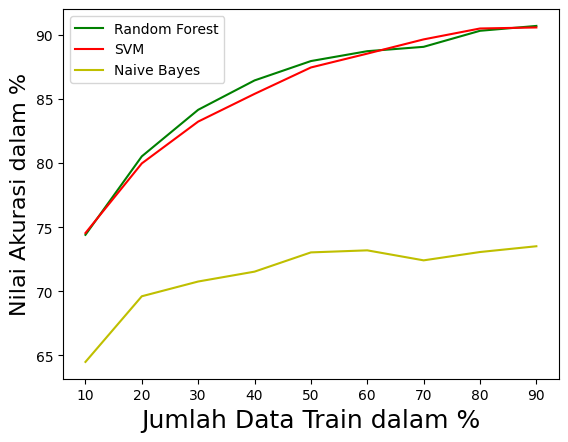

In [ ]:
plt.plot(df_akurasi['data_train'], df_akurasi['random_forest'], 'g', label='Random Forest')
plt.plot(df_akurasi['data_train'], df_akurasi['SVM'], 'r', label='SVM')
plt.plot(df_akurasi['data_train'], df_akurasi['naive_bayes'], 'y', label='Naive Bayes')
plt.xlabel('Jumlah Data Train dalam %', fontsize=18)
plt.ylabel('Nilai Akurasi dalam %', fontsize=16)
plt.legend()
plt.show()

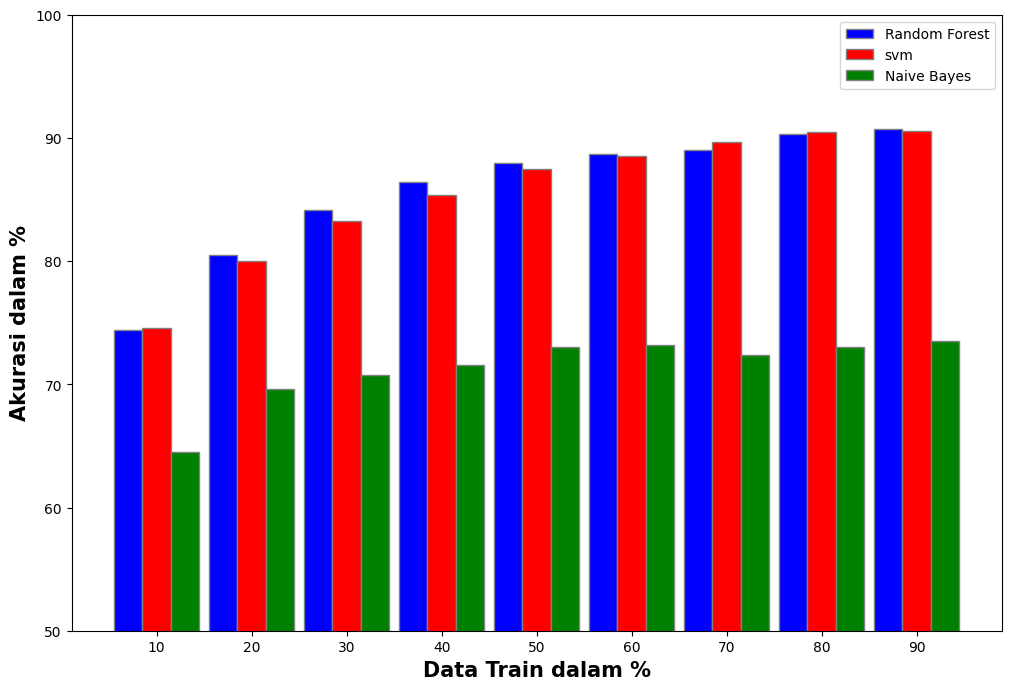

In [ ]:
#sorting berdasarkan data train ascending
df_akurasi = df_akurasi.sort_values(by='data_train', ascending=True)
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))

# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(df_akurasi['random_forest']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, df_akurasi['random_forest'], color ='blue', width = barWidth,
		edgecolor ='grey', label ='Random Forest')
plt.bar(br2, df_akurasi['SVM'], color ='red', width = barWidth,
		edgecolor ='grey', label ='svm')
plt.bar(br3, df_akurasi['naive_bayes'], color ='green', width = barWidth,
		edgecolor ='grey', label ='Naive Bayes')

plt.ylim(50, 100)
# Adding Xticks
plt.xlabel('Data Train dalam %', fontweight ='bold', fontsize = 15)
plt.ylabel('Akurasi dalam %', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_akurasi['random_forest']))],
		df_akurasi['data_train'])

plt.legend()
plt.show()

# MISCELLANEOUS

In [ ]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)
fd.most_common(3)

[('bagus', 3726), ('anak', 3139), ('ajar', 2621)]

In [ ]:
fd.tabulate(3)

bagus  anak  ajar 
 3726  3139  2621 


In [ ]:
top_10 = fd.most_common(10)

fdist = pd.Series(dict(top_10))

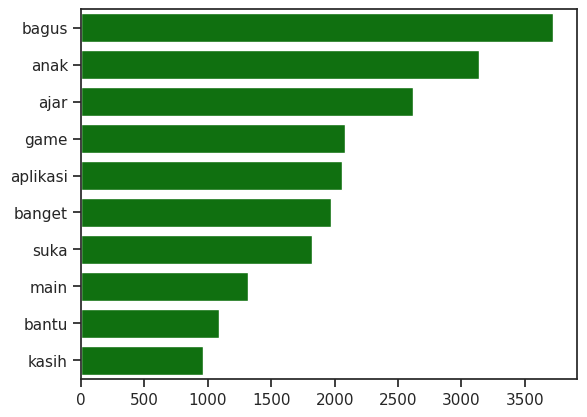

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='green');

In [ ]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.show()
